## 检查 MMDetection 版本

In [1]:
# Check nvcc version
!nvcc -V

# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:49:14_PDT_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0


gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env
import mmdet

def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available: True
MUSA available: False
numpy_random_seed: 2147483648
GPU 0,1: NVIDIA GeForce RTX 3080
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.7, V11.7.99
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 2.0.0+cu117
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch

# 加载训练好的模型预测

In [1]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
config = '../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/faster-rcnn_r50_fpn_1x_voc0712.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best*.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:1'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
external_imgs = glob.glob('/hy-tmp/mmdetection/external_images/*.jpg')
external_result = inferencer(external_imgs, out_dir='./output_external_faster_rcnn', pred_score_thr=0.5)

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
test_result = inferencer(test_imgs, out_dir='./output_test_faster_rcnn', pred_score_thr=0.5)

Loads checkpoint by local backend from path: ../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best_pascal_voc_mAP_epoch_4.pth
05/30 02:37:22 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


/usr/local/miniconda3/lib/python3.8/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.TensorboardVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: 
The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(

/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: 
The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(

In [2]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
# config = '../configs/yolo/yolov3_d53_8xb8-ms-608-273e_voc07_v2.py'
config = '../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/yolov3_d53_8xb8-ms-608-273e_coco_v3.py'
# Setup a checkpoint file to load
# checkpoint = glob.glob('../work_dirs/yolov3_d53_8xb8-ms-608-273e_voc07_v2/epoch_14.pth')[-1]
checkpoint = glob.glob('../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/best*.pth')[-1]
# Set the device to be used for evaluation
device = 'cuda:1'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
external_imgs = glob.glob('/hy-tmp/mmdetection/external_images/*.jpg')
external_result = inferencer(external_imgs, out_dir='./output_external_yolov3', pred_score_thr=0.3)

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
test_result = inferencer(test_imgs, out_dir='./output_test_yolov3', pred_score_thr=0.3)

Loads checkpoint by local backend from path: ../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/best_coco_bbox_mAP_epoch_31.pth


/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:508: UserWarning: Warning: 
The text is out of bounds, the drawn text may not be in the image
  warnings.warn(

# 查看训练好的Faster R-CNN第一阶段产生的proposal box

In [2]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
config = '../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/faster-rcnn_r50_fpn_1x_voc0712.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best*.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:1'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

model = inferencer.model
print(model)

Loads checkpoint by local backend from path: ../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best_pascal_voc_mAP_epoch_4.pth
FasterRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

In [3]:
from rich.progress import track
test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
inputs = test_imgs
batch_size = 1
kwargs = {}

(
    preprocess_kwargs,
    forward_kwargs,
    visualize_kwargs,
    postprocess_kwargs,
) = inferencer._dispatch_kwargs(**kwargs)
ori_inputs = inferencer._inputs_to_list(inputs)
# Currently only supports bs=1
tokens_positive=None
tokens_positive = [tokens_positive] * len(ori_inputs)
inputs = inferencer.preprocess(
            ori_inputs, batch_size=batch_size, **preprocess_kwargs)
results_dict = {'predictions': [], 'visualization': []}
for ori_imgs, data in (track(inputs, description='Inference')
                        if inferencer.show_progress else inputs):
    preds = inferencer.forward(data, **forward_kwargs)
    break

In [4]:
data

{'inputs': [tensor([[[ 31,  30,  30,  ...,  50,  48,  47],
           [ 36,  36,  37,  ...,  52,  49,  46],
           [ 42,  44,  46,  ...,  55,  50,  45],
           ...,
           [ 85,  84,  82,  ...,   4,  20,  34],
           [ 86,  82,  76,  ...,  34,  39,  41],
           [ 84,  79,  70,  ...,  59,  52,  46]],
  
          [[113, 111, 108,  ...,  87,  85,  84],
           [116, 115, 113,  ...,  89,  86,  83],
           [120, 120, 120,  ...,  92,  86,  82],
           ...,
           [145, 144, 142,  ...,  63,  83,  99],
           [148, 144, 137,  ...,  88,  96, 102],
           [148, 142, 133,  ..., 109, 107, 103]],
  
          [[ 94,  92,  90,  ..., 109, 107, 106],
           [ 98,  97,  96,  ..., 111, 108, 105],
           [103, 104, 104,  ..., 114, 109, 104],
           ...,
           [122, 121, 119,  ...,  43,  60,  73],
           [121, 118, 113,  ...,  73,  76,  78],
           [119, 115, 109,  ...,  96,  89,  82]]], dtype=torch.uint8)],
 'data_samples': [<DetDataSam

In [5]:
# 1. 数据预处理
preprocessed_x = model.data_preprocessor(data)

# 2. 特征提取
features = model.backbone(preprocessed_x['inputs'])

# 3. 特征融合
fused_features = model.neck(features)

# 4. 区域提议网络
rpn_outs = model.rpn_head(fused_features)

In [24]:
help(model.rpn_head.forward)

Help on method forward in module mmdet.models.dense_heads.anchor_head:

forward(x: Tuple[torch.Tensor]) -> Tuple[List[torch.Tensor]] method of mmdet.models.dense_heads.rpn_head.RPNHead instance
    Forward features from the upstream network.
    
    Args:
        x (tuple[Tensor]): Features from the upstream network, each is
            a 4D-tensor.
    
    Returns:
        tuple: A tuple of classification scores and bbox prediction.
    
            - cls_scores (list[Tensor]): Classification scores for all                     scale levels, each is a 4D-tensor, the channels number                     is num_base_priors * num_classes.
            - bbox_preds (list[Tensor]): Box energies / deltas for all                     scale levels, each is a 4D-tensor, the channels number                     is num_base_priors * 4.



In [6]:
data['data_samples'][0].keys()

['gt_instances', 'ignored_instances']

In [7]:
losses, predictions=model.rpn_head.loss_and_predict(fused_features, preprocessed_x['data_samples'])

In [8]:
predictions[0]['bboxes'].shape

torch.Size([1000, 4])

In [10]:
proposals = [rpn_results.bboxes for rpn_results in predictions]

In [11]:
proposals

[tensor([[175.8007, 107.8368, 613.3583, 572.2577],
         [ 72.4048, 208.8379, 513.0844, 600.0000],
         [ 26.2456, 113.9492, 732.9941, 595.1466],
         ...,
         [754.9713, 216.8358, 800.0000, 259.9553],
         [787.9808,  74.1313, 800.0000, 120.1570],
         [  0.0000, 479.9567,  39.7680, 600.0000]])]

In [28]:
roi_head_out = model.roi_head(fused_features, predictions, preprocessed_x['data_samples'])

In [17]:
len(fused_features), fused_features[0].shape, fused_features[1].shape, fused_features[2].shape, fused_features[3].shape, fused_features[4].shape

(5,
 torch.Size([1, 256, 152, 200]),
 torch.Size([1, 256, 76, 100]),
 torch.Size([1, 256, 38, 50]),
 torch.Size([1, 256, 19, 25]),
 torch.Size([1, 256, 10, 13]))

In [13]:
len(roi_head_out), roi_head_out[0].shape, roi_head_out[1].shape

(2, torch.Size([1000, 21]), torch.Size([1000, 80]))

In [19]:
model.roi_head.with_bbox, model.roi_head.with_shared_head

(True, False)

In [29]:
roi_head_out[1][0]

tensor([-0.8790, -0.0051,  0.9802, -0.1943, -0.8177,  0.2472,  0.9719,  0.1191,
        -1.0045,  0.0968,  1.1074,  0.2854, -0.8486,  0.0304,  1.0527,  0.0784,
        -0.8806,  0.1829,  0.9584, -0.0399, -0.8075,  0.0745,  1.0387, -0.0949,
        -0.9681, -0.2694,  1.2196, -0.2253, -0.9356,  0.0888,  1.0319,  0.3813,
        -0.6219,  0.3695,  1.1558,  0.4116, -1.1137,  0.3657,  1.1096,  0.3295,
        -0.6853,  0.1733,  0.7775, -0.0116, -0.9659,  0.3817,  1.0518,  0.0743,
        -1.0623,  0.5355,  1.1408,  0.2580, -0.7932,  0.1044,  0.7483,  0.3084,
        -0.7450,  0.0686,  0.7489,  0.5262, -0.8640,  0.0920,  1.1482,  0.2330,
        -1.0713,  0.2925,  1.0338,  0.2812, -0.7565,  0.2400,  1.3292,  0.4710,
        -0.8391, -0.0274,  0.9542,  0.3199, -0.7021, -0.0241,  1.1607, -0.0626],
       grad_fn=<SelectBackward0>)

In [40]:
import torch
import numpy as np
from torchvision.ops import nms

# 示例数据
bbox_pred = roi_head_out[1]  # 预测的边界框偏移量，假设有 20 个类别
rpn_proposals = predictions[0]['bboxes']  # 初始候选框
cls_scores = roi_head_out[0]  # 类别得分，21 个类别，包括背景


# 对类别得分进行 Softmax 操作
cls_scores_softmax = torch.nn.functional.softmax(cls_scores, dim=1)

# 获取每个候选框中概率最高的类别和对应的概率值
max_scores, max_classes = torch.max(cls_scores_softmax, dim=1)

# 解码边界框预测
def decode_boxes(boxes, deltas, num_classes):
    boxes = boxes.unsqueeze(1).expand(-1, num_classes, -1)  # 扩展为 [1000, num_classes, 4]
    deltas = deltas.view(-1, num_classes, 4)  # 重新塑形为 [1000, num_classes, 4]
    
    widths = boxes[:, :, 2] - boxes[:, :, 0]
    heights = boxes[:, :, 3] - boxes[:, :, 1]
    ctr_x = boxes[:, :, 0] + 0.5 * widths
    ctr_y = boxes[:, :, 1] + 0.5 * heights

    dx = deltas[:, :, 0]
    dy = deltas[:, :, 1]
    dw = deltas[:, :, 2]
    dh = deltas[:, :, 3]

    pred_ctr_x = ctr_x + dx * widths
    pred_ctr_y = ctr_y + dy * heights
    pred_w = torch.exp(dw) * widths
    pred_h = torch.exp(dh) * heights

    pred_boxes = torch.zeros_like(deltas)
    pred_boxes[:, :, 0] = pred_ctr_x - 0.5 * pred_w  # xmin
    pred_boxes[:, :, 1] = pred_ctr_y - 0.5 * pred_h  # ymin
    pred_boxes[:, :, 2] = pred_ctr_x + 0.5 * pred_w  # xmax
    pred_boxes[:, :, 3] = pred_ctr_y + 0.5 * pred_h  # ymax

    return pred_boxes

num_classes = 20
# 使用解码函数获取最终边界框，假设有 20 个类别
decoded_boxes = decode_boxes(rpn_proposals, bbox_pred, num_classes)

# 选择最高得分类别对应的边界框
final_boxes = decoded_boxes[torch.arange(1000), max_classes - 1]

# 确保边界框在图像范围内，并且没有负数
final_boxes[:, 0::2] = torch.clamp(final_boxes[:, 0::2], min=0)  # 限制 x 坐标
final_boxes[:, 1::2] = torch.clamp(final_boxes[:, 1::2], min=0)  # 限制 y 坐标

# 应用非极大值抑制 (NMS)
iou_threshold = 0.5
selected_indices = nms(final_boxes, max_scores, iou_threshold)

# 根据 NMS 的结果选择最终的检测结果
final_boxes = final_boxes[selected_indices]
final_scores = max_scores[selected_indices]
final_class_ids = max_classes[selected_indices]

# 打印最终的检测结果
for box, score, class_id in zip(final_boxes, final_scores, final_class_ids):
    if class_id.item() == 20:
        continue
    print(f"Class: {class_id.item()}, Score: {score.item()}, Box: {box.tolist()}")


Class: 16, Score: 0.9921013712882996, Box: [0.0, 89.61196899414062, 706.2550048828125, 675.891845703125]
Class: 16, Score: 0.9853728413581848, Box: [462.45928955078125, 413.917236328125, 1081.037353515625, 975.484619140625]
Class: 16, Score: 0.9814093112945557, Box: [0.0, 0.0, 0.0, 570.081298828125]
Class: 16, Score: 0.9741577506065369, Box: [0.0, 0.0, 0.0, 543.6066284179688]
Class: 16, Score: 0.9081477522850037, Box: [0.0, 0.0, 0.0, 440.48553466796875]
Class: 16, Score: 0.7819356322288513, Box: [0.0, 545.3880615234375, 112.25569915771484, 1238.567626953125]
Class: 16, Score: 0.6776017546653748, Box: [0.0, 0.0, 0.0, 882.4060668945312]
Class: 16, Score: 0.6219878196716309, Box: [0.0, 311.27642822265625, 0.0, 722.7090454101562]


In [33]:
test_result['predictions'][0]

{'labels': [16],
 'scores': [0.9921013712882996],
 'bboxes': [[49.172630310058594,
   67.4918212890625,
   385.4598693847656,
   374.54534912109375]]}

In [163]:
dir(inferencer)

['__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_dispatch_kwargs',
 '_get_chunk_data',
 '_get_models_from_metafile',
 '_get_repo_or_mim_dir',
 '_get_transform_idx',
 '_init_collate',
 '_init_model',
 '_init_pipeline',
 '_init_visualizer',
 '_inputs_to_list',
 '_load_model_from_metafile',
 '_load_weights_to_model',
 'cfg',
 'collate_fn',
 'forward',
 'forward_kwargs',
 'list_models',
 'model',
 'num_predicted_imgs',
 'num_visualized_imgs',
 'palette',
 'pipeline',
 'postprocess',
 'postprocess_kwargs',
 'pred2dict',
 'preprocess',
 'preprocess_kwargs',
 'scope',
 'show_progress',
 'visualize',
 'vis

In [157]:
roi_head_out[0][0]

tensor([-1.2336, -3.0248,  1.7011, -2.4804, -2.6574, -2.0331,  0.1405,  1.1457,
        -2.2107,  6.6924, -3.1179,  2.9656,  1.7292, -3.5520, -1.2706, -2.2056,
        11.6156, -2.0883, -1.3845, -2.1022,  3.6754],
       grad_fn=<SelectBackward0>)

In [161]:
roi_head_out[1][0]

tensor([-0.8790, -0.0051,  0.9802, -0.1943, -0.8177,  0.2472,  0.9719,  0.1191,
        -1.0045,  0.0968,  1.1074,  0.2854, -0.8486,  0.0304,  1.0527,  0.0784,
        -0.8806,  0.1829,  0.9584, -0.0399, -0.8075,  0.0745,  1.0387, -0.0949,
        -0.9681, -0.2694,  1.2196, -0.2253, -0.9356,  0.0888,  1.0319,  0.3813,
        -0.6219,  0.3695,  1.1558,  0.4116, -1.1137,  0.3657,  1.1096,  0.3295,
        -0.6853,  0.1733,  0.7775, -0.0116, -0.9659,  0.3817,  1.0518,  0.0743,
        -1.0623,  0.5355,  1.1408,  0.2580, -0.7932,  0.1044,  0.7483,  0.3084,
        -0.7450,  0.0686,  0.7489,  0.5262, -0.8640,  0.0920,  1.1482,  0.2330,
        -1.0713,  0.2925,  1.0338,  0.2812, -0.7565,  0.2400,  1.3292,  0.4710,
        -0.8391, -0.0274,  0.9542,  0.3199, -0.7021, -0.0241,  1.1607, -0.0626],
       grad_fn=<SelectBackward0>)

In [156]:
sum(roi_head_out[0][0])

tensor(0.3045, grad_fn=<AddBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


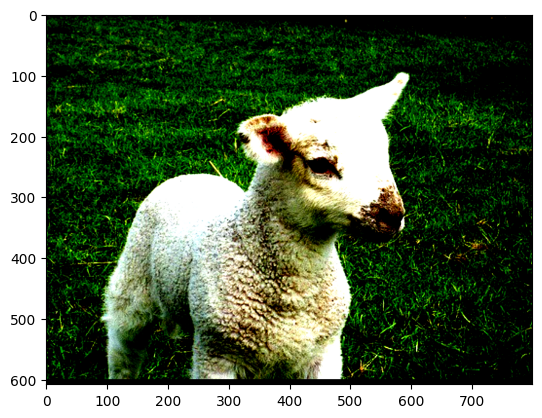

torch.Size([1, 3, 608, 800])


In [71]:
data_preprocessor_out = model.data_preprocessor(data)
import matplotlib.pyplot as plt
plt.imshow(data_preprocessor_out['inputs'][0].cpu().numpy().transpose(1, 2, 0))
plt.show()
print(data_preprocessor_out['inputs'].shape)

In [87]:
len(rpn_outs[0]), rpn_outs[0][0].shape, rpn_outs[0][1].shape, rpn_outs[0][2].shape, rpn_outs[0][3].shape, rpn_outs[0][4].shape

(5,
 torch.Size([1, 3, 152, 200]),
 torch.Size([1, 3, 76, 100]),
 torch.Size([1, 3, 38, 50]),
 torch.Size([1, 3, 19, 25]),
 torch.Size([1, 3, 10, 13]))

In [86]:
len(rpn_outs[1]), rpn_outs[1][0].shape, rpn_outs[1][1].shape, rpn_outs[1][2].shape, rpn_outs[1][3].shape, rpn_outs[1][4].shape, 

(5,
 torch.Size([1, 12, 152, 200]),
 torch.Size([1, 12, 76, 100]),
 torch.Size([1, 12, 38, 50]),
 torch.Size([1, 12, 19, 25]),
 torch.Size([1, 12, 10, 13]))

In [93]:
type(data)

dict

In [118]:
dir(model.rpn_head)

['T_destination',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_bbox_post_process',
 '_buffers',
 '_call_impl',
 '_dump_init_info',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_get_targets_single',
 '_init_layers',
 '_is_full_backward_hook',
 '_is_init',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',

In [92]:
help(model.rpn_head.loss_and_predict)

Help on method loss_and_predict in module mmdet.models.dense_heads.base_dense_head:

loss_and_predict(x: Tuple[torch.Tensor], batch_data_samples: List[mmdet.structures.det_data_sample.DetDataSample], proposal_cfg: Union[mmengine.config.config.ConfigDict, NoneType] = None) -> Tuple[dict, List[mmengine.structures.instance_data.InstanceData]] method of mmdet.models.dense_heads.rpn_head.RPNHead instance
    Perform forward propagation of the head, then calculate loss and
    predictions from the features and data samples.
    
    Args:
        x (tuple[Tensor]): Features from FPN.
        batch_data_samples (list[:obj:`DetDataSample`]): Each item contains
            the meta information of each image and corresponding
            annotations.
        proposal_cfg (ConfigDict, optional): Test / postprocessing
            configuration, if None, test_cfg would be used.
            Defaults to None.
    
    Returns:
        tuple: the return value is a tuple contains:
    
            - lo

In [75]:
dir(model.rpn_head)

['T_destination',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_bbox_post_process',
 '_buffers',
 '_call_impl',
 '_dump_init_info',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_get_targets_single',
 '_init_layers',
 '_is_full_backward_hook',
 '_is_init',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',

In [73]:
data_preprocessor_out['data_samples']

[<DetDataSample(
 
     META INFORMATION
     scale_factor: (1.6, 1.6)
     img_path: '/hy-tmp/mmdetection/test_raw/001344.jpg'
     ori_shape: (375, 500)
     pad_shape: (608, 800)
     batch_input_shape: (608, 800)
     img_shape: (600, 800)
 
     DATA FIELDS
     ignored_instances: <InstanceData(
         
             META INFORMATION
         
             DATA FIELDS
             bboxes: tensor([], device='cuda:1', size=(0, 4))
             labels: tensor([], device='cuda:1', dtype=torch.int64)
         ) at 0x14702b852880>
     gt_instances: <InstanceData(
         
             META INFORMATION
         
             DATA FIELDS
             bboxes: tensor([], device='cuda:1', size=(0, 4))
             labels: tensor([], device='cuda:1', dtype=torch.int64)
         ) at 0x14702b852b50>
 ) at 0x14702b6a14f0>]

In [57]:
backbone_out = model.backbone.forward(data_preprocessor_out['inputs'])
backbone_out

(tensor([[[[0.0052, 0.0050, 0.0052,  ..., 0.0054, 0.0052, 0.0118],
           [0.0052, 0.0049, 0.0051,  ..., 0.0062, 0.0057, 0.0159],
           [0.0055, 0.0057, 0.0056,  ..., 0.0060, 0.0060, 0.0179],
           ...,
           [0.0047, 0.0051, 0.0048,  ..., 0.0055, 0.0049, 0.0125],
           [0.0041, 0.0046, 0.0046,  ..., 0.0053, 0.0045, 0.0158],
           [0.0209, 0.0145, 0.0139,  ..., 0.0152, 0.0165, 0.0248]],
 
          [[0.0113, 0.0116, 0.0119,  ..., 0.0114, 0.0118, 0.0000],
           [0.0105, 0.0113, 0.0115,  ..., 0.0100, 0.0093, 0.0000],
           [0.0129, 0.0103, 0.0122,  ..., 0.0637, 0.0506, 0.0103],
           ...,
           [0.0119, 0.0117, 0.0119,  ..., 0.0115, 0.0121, 0.0000],
           [0.0112, 0.0107, 0.0111,  ..., 0.0231, 0.0296, 0.0153],
           [0.1241, 0.1266, 0.1271,  ..., 0.1236, 0.1198, 0.0982]],
 
          [[0.0285, 0.0316, 0.1526,  ..., 0.2616, 0.2890, 0.5583],
           [0.0000, 0.0423, 0.0462,  ..., 0.1541, 0.1251, 0.4634],
           [0.0000, 0.09

In [59]:
backbone_out[0].shape, backbone_out[1].shape, backbone_out[2].shape, backbone_out[3].shape

(torch.Size([1, 256, 152, 200]),
 torch.Size([1, 512, 76, 100]),
 torch.Size([1, 1024, 38, 50]),
 torch.Size([1, 2048, 19, 25]))

In [63]:
fpn_out = model.neck.forward(backbone_out)
len(fpn_out), fpn_out[0].shape, fpn_out[1].shape, fpn_out[2].shape, fpn_out[3].shape, fpn_out[4].shape, 

(5,
 torch.Size([1, 256, 152, 200]),
 torch.Size([1, 256, 76, 100]),
 torch.Size([1, 256, 38, 50]),
 torch.Size([1, 256, 19, 25]),
 torch.Size([1, 256, 10, 13]))

In [64]:
rpn_out = model.roi_head.forward(fpn_out)
len(rpn_out)

TypeError: forward() missing 1 required positional argument: 'rpn_results_list'

In [66]:
help(model.roi_head.forward)

Help on method forward in module mmdet.models.roi_heads.standard_roi_head:

forward(x: Tuple[torch.Tensor], rpn_results_list: List[mmengine.structures.instance_data.InstanceData], batch_data_samples: List[mmdet.structures.det_data_sample.DetDataSample] = None) -> tuple method of mmdet.models.roi_heads.standard_roi_head.StandardRoIHead instance
    Network forward process. Usually includes backbone, neck and head
    forward without any post-processing.
    
    Args:
        x (List[Tensor]): Multi-level features that may have different
            resolutions.
        rpn_results_list (list[:obj:`InstanceData`]): List of region
            proposals.
        batch_data_samples (list[:obj:`DetDataSample`]): Each item contains
        the meta information of each image and corresponding
        annotations.
    
    Returns
        tuple: A tuple of features from ``bbox_head`` and ``mask_head``
        forward.



In [61]:
len(fpn_out)

5

In [42]:
data['data_samples']

[<DetDataSample(
 
     META INFORMATION
     scale_factor: (1.6, 1.6)
     img_path: '/hy-tmp/mmdetection/test_raw/001344.jpg'
     img_shape: (600, 800)
     ori_shape: (375, 500)
 
     DATA FIELDS
     ignored_instances: <InstanceData(
         
             META INFORMATION
         
             DATA FIELDS
             bboxes: HorizontalBoxes(
                 tensor([], size=(0, 4)))
             labels: tensor([], dtype=torch.int64)
         ) at 0x1470281df6d0>
     gt_instances: <InstanceData(
         
             META INFORMATION
         
             DATA FIELDS
             bboxes: HorizontalBoxes(
                 tensor([], size=(0, 4)))
             labels: tensor([], dtype=torch.int64)
         ) at 0x1470271efd00>
 ) at 0x1470271ef8e0>]

In [41]:
len(data['inputs']), data['inputs'][0].shape

(1, torch.Size([3, 600, 800]))

In [135]:
predictions[0]['bboxes']

RuntimeError: CUDA error: an illegal memory access was encountered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


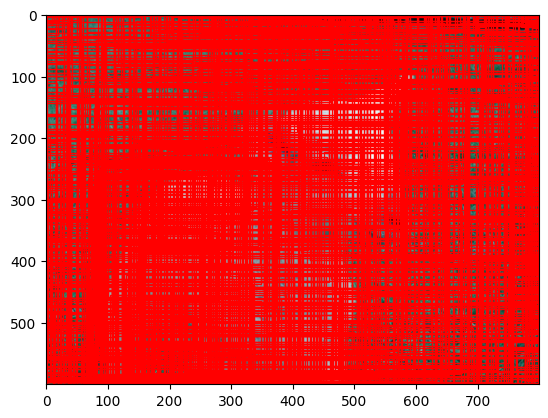

In [38]:
import matplotlib.pyplot as plt
plt.imshow(data['inputs'][0].cpu().numpy().transpose(1, 2, 0))
bboxes= predictions[0]['bboxes'].cpu().numpy()
for i in range(1000):
    bbox = bboxes[i]
    plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='r', linewidth=1))
plt.show()

In [33]:
dir(preds[0])
(preds[0]).proposals()

AttributeError: 'DetDataSample' object has no attribute '_proposals'

In [34]:
preds[0]

<DetDataSample(

    META INFORMATION
    scale_factor: (1.6, 1.6)
    img_path: '/hy-tmp/mmdetection/test_raw/001344.jpg'
    ori_shape: (375, 500)
    pad_shape: (608, 800)
    batch_input_shape: (608, 800)
    img_shape: (600, 800)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:1', size=(0, 4))
            labels: tensor([], device='cuda:1', dtype=torch.int64)
        ) at 0x1470281dfeb0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 49.1689,  67.4840, 385.4611, 374.5520]], device='cuda:1')
            labels: tensor([16], device='cuda:1')
            scores: tensor([0.9921], device='cuda:1')
        ) at 0x1470281dfbb0>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:1', siz

# 可视化训练图片的标签

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import json
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# 加载 COCO 格式的标注文件
with open('/hy-tmp/mmdetection/external_images/instances_val2017.json') as f:
    instances = json.load(f)
instances_df = pd.DataFrame(instances['annotations'])
# 获取选定图片的文件名列表
external_imgs = glob.glob('/hy-tmp/mmdetection/external_images/*.jpg')
external_imgs = [os.path.basename(img) for img in external_imgs]

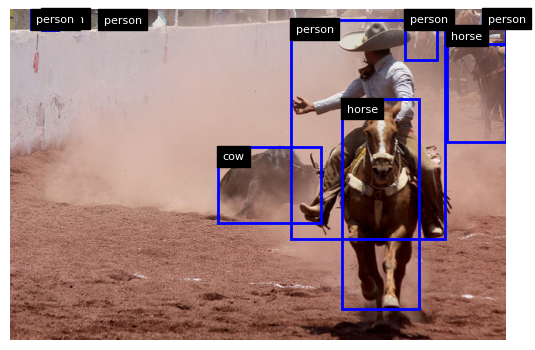

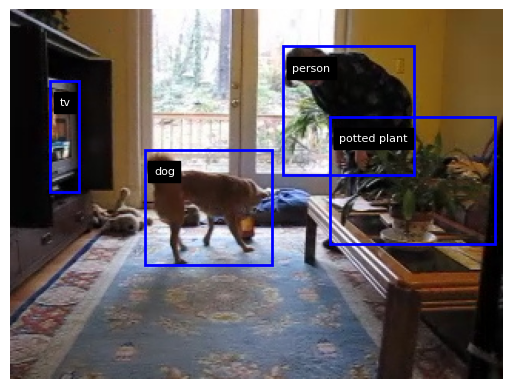

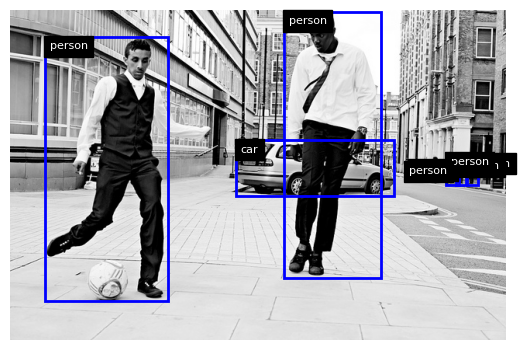

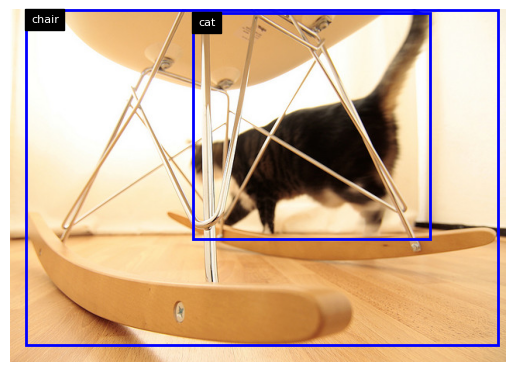

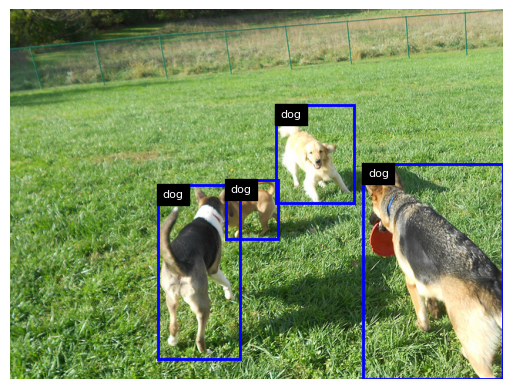

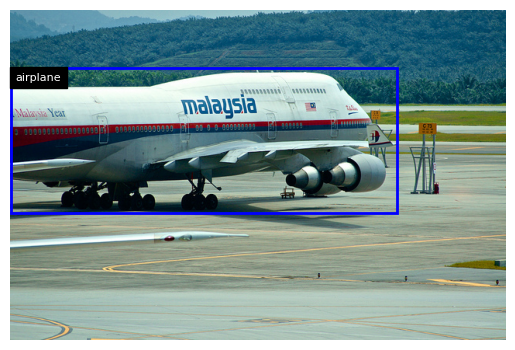

In [2]:
import matplotlib.patches as patches
from PIL import Image

# 创建一个字典，用于快速查找文件名对应的图片ID
image_id_map = {img['file_name']: img['id'] for img in instances['images']}
cate_map = {cat['id']: cat['name'] for cat in instances['categories']}
for img_file in external_imgs:
    image_id = image_id_map.get(img_file)
    anno = instances_df[instances_df['image_id'] == image_id]
    img = Image.open(f'/hy-tmp/mmdetection/external_images/{img_file}')
    # plt.imshow(img)  # 显示图片
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for idx,  row in anno.iterrows(): 
        # 排除不在VOC中的类别
        if cate_map[row['category_id']] in ['teddy bear', 'tie', 'sports ball', 'frisbee']:
            continue
        xmin, ymin, width, height = row['bbox']
        # 创建一个矩形补丁
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor = 'b', facecolor='none')
        # 添加矩形补丁到图像中
        ax.add_patch(rect)
        # 添加类别标签
        plt.text(xmin + 6, ymin + 16, cate_map[row['category_id']], color='w', fontsize=8, bbox=dict(facecolor='black'))
    # plt.show()
    # 移除坐标轴
    ax.set_axis_off()

    # 保存图像
    output_path = f'external_gd/vis/{img_file}'
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()

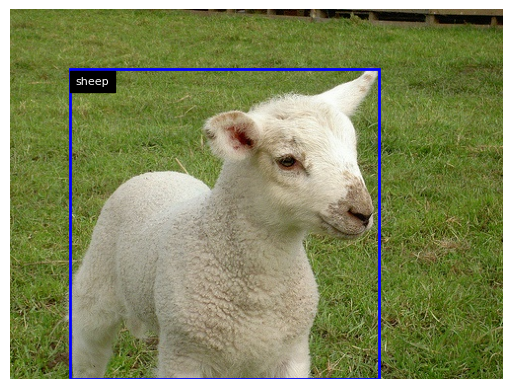

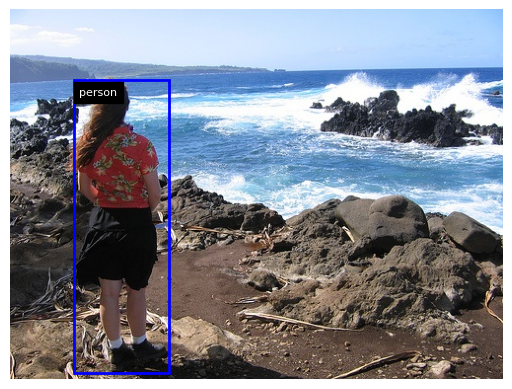

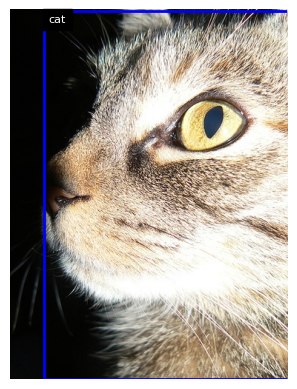

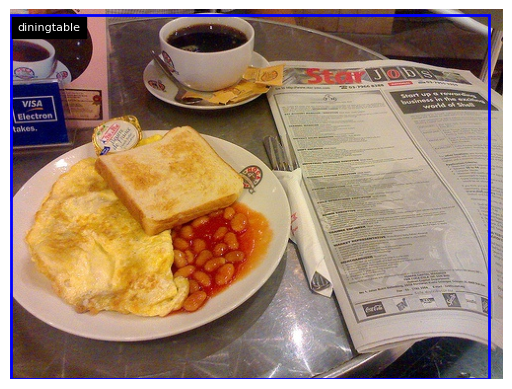

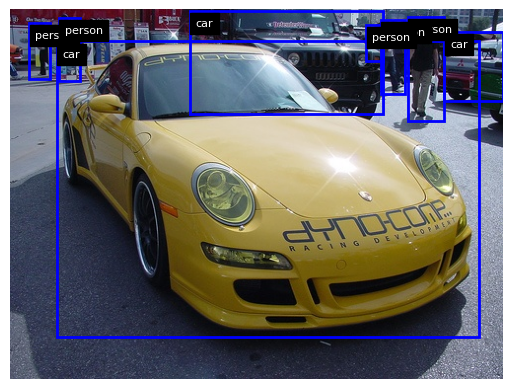

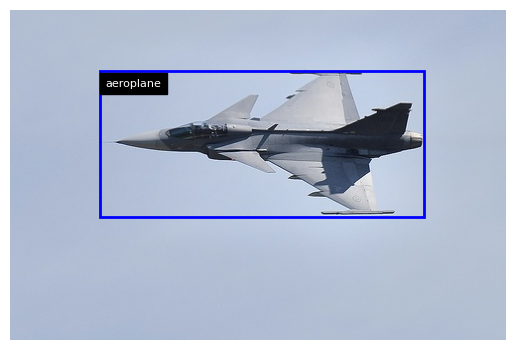

In [3]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    boxes = []
    labels = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        boxes.append((xmin, ymin, xmax, ymax))
        labels.append(label)

    return boxes, labels

import matplotlib.patches as patches
from PIL import Image

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
for img_file in test_imgs:
    anno_path = os.path.join('/hy-tmp/datasets/VOCdevkit/VOC2007/Annotations/', os.path.basename(img_file).replace('.jpg', '.xml'))
    boxes, labels = parse_annotation(anno_path)
    # anno = instances_df[instances_df['image_id'] == image_id]
    img = Image.open(img_file)
    # plt.imshow(img)  # 显示图片
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for box, label in zip(boxes, labels):
        xmin, ymin, xmax, ymax = box
        width = xmax - xmin
        height = ymax - ymin
        # 创建一个矩形补丁
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='b', facecolor='none')
        # 添加矩形补丁到图像中
        ax.add_patch(rect)
        # 添加类别标签
        plt.text(xmin + 6, ymin + 16, label, color='w', fontsize=8, bbox=dict(facecolor='black'))
    
    # 移除坐标轴
    ax.set_axis_off()

    # 保存图像
    output_path = f'test_gd/vis/{os.path.basename(img_file)}'
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()